# Mushroom  Species Classification 

The purpose of this project is for me to learn about deep learning with PyTorch, using the fastai front end. 

**Keywords:** neural nets, deep learning, pytorch, fastai, transfer learning, fine tuning, one cycle learning, boot strapping, fine grain classification. 

## Introduction

Being able to tell one mushroom species from another can mean the difference between picking yourself a tasty meal or ending up with something that could make you sick or even lead to death. Approximately 14,000 species of mushrooms have been cataloged world wide and creating a classifier that has been trained on all of these species presents a data collection challenge that I was not prepared to undertake. In this project I wanted to perform the data collection and data cleaning steps myself, to keep things managable I decided to work toward creating a classifier that will be useful to people foraging in a more localized geographical area. I learned that mushroom foraging is a popular activity in the Canadian province of British Columbia. Being a canadian myseld, this is the geographical region I decided to focus my efforts on. 

## Data exploration and cleaning

The list of species of mushroom to included in this project was obtained from [The University of British Columbia Zoology website](https://www.zoology.ubc.ca/~biodiv/mushroom/). This directory contains a list of edible and poisonous species of coastal BC and the Pacific Northwest. There are three reasons that I choose this database to draw from:

    1. This list includes the majority of the most common mushroom species found in BC.
  
As a result, even though my classifier only includes 73 species of mushrooms (of the thousands of possible species), my final mushroom classifier may have some untility for people searching for mushrooms in this limited geograpjhical region. 
   
    2. The list contains numerous instances of mustroom species coming from the same family.
    3. Included in the information provided about each species is a list of mushroom species that look similar to the given species. 
    
        This is desirable because it adds a significant challenge to the problem. It would have been much easier to distinguish between species of mushrooms that have subtantially different features. Using the information about similarity, 18 species of mushroom that looked similar to the 58 species of mushrooms in the UBC database where identified, giving a total of 76 species.
        

The top 300 images (using the species name as the search term) were downloaded from bing image search using [](). *some not dled*

This tool had the advantage of allowing me to automate the gathering of a data set containing over 22,000 images in 76 categories. However this automation comes at the cost of introducing a subtantial amount of noise into the data set. The top 300 image search results included the following types of undesired images:

    1. Cartoon images
    2. Images that did not contain mushrooms
    3. Images that contained more than one type of mushroom
    4. Images that were too zoomed out
    5. Images that were too close up
    6. Images with writing or objects obscuring the mushrooms
    7. Images that featured objects such as: people, swiss army knives, baskets, tupperware, cell phones
    8. Images that did not contain any intact mushrooms
    9. Black and white images
    10. duplicate images
    11. Images of cooked mushrooms
    12. Images of mouldy mushrooms
    13. Blurry images 
    14. Images that were too small
    15. Low contrast images

My reasoning for removing these images was that they would be misleading the classifier in some way. For instance I noticed that there were a number of images that contained a swiss army knife. These images originated from the same source, it appeared that this person had taken pictures of various mushrooms with the swiss army knife included for size comparison. If those images were included in the training set, they could easily be confused for one another and lead to misclassification of the mushroom in the image. The initial data set was cleaned by me, I made two passes through the entire set of images, looking at each image and deleting any misleading images. In the process of doing this 3 of the categories ended up with fewer than 50 images, these categories were excluded from the final data set. The final data set contains 16729 images from 73 categories, 80 percent of the images were used for training, the remaining 20 percent was used for validation (sometimes also refered to as the test set). Looking through every single image like this is very time consuming and tedious (in this case I spent nearly 15 hours), at the same time, data cleaning is an indespensible part of any machine learning workflow. 

> The first step to training a neural net is to not touch any neural net code at all and instead begin by thoroughly inspecting your data. This step is critical. I like to spend copious amount of time (measured in units of hours) scanning through thousands of examples, understanding their distribution and looking for patterns.
-- Andrej Karpathy (Director of AI, Tesla)

Some of these types of noise such as images of non-mushroom and cartoon images can be removed from the data set without introducing subtaintial limitations as to the types of images that can be input by a user in the final production model. Removal of other types of noise (zoomed out images, zoomed in images, blurry images etc...) introduces limitations on the generalizability of the model that need to be communicated to the user so that she can obtain the most reliable predictions from the model. For example the limitations on the input image might read: Pictures should be in colour, from close up, of the whole intact fresh (not rotted, not cooked) mushroom(s). I may also be a good idea to further guide the user by providing examples of acceptable and unacceptable images.

**--insert examples here--**

In [2]:
# doing this to see that data is not cropped or resized poorly.
data.show_batch(rows=5, figsize=(11,8))

NameError: name 'data' is not defined

Our data set contains an average of 229 images per category (max=*, min=*), this is more images than 

## Training the neural net v1

In this first version of the project I will restrict myself to the techniques introduced to me in in the first 3 lessons of the course ["practical deep learning for coders"](https://course.fast.ai/). In later versions of the project I intend to improve on the results that I achieve here and finally put the model into production. 


For our neural net architechture we will choose resnet50, a convolutional neural network which has been designed to perform well on image classification tasks. Rather than initializing the parameters of the neural net randomly, we will use a pretrained version of resnet50 that has been trained with over 1 million images from the [imagenet](http://www.image-net.org/) database, which consists of images from 1000 categories. This idea is known as transfer learning. Transfer learning will allow us to train a neural network that is good at recognizing images of mushrooms, with a relatively small amount of data. This works because the neural net starts out already able to recognize images, it only needs to be finetuned and specialized to recognize mushroom images. 

Another idea that can be useful when working limited datasets is to generate more data from the data that you already have by applying transformations, this is known as data augmentation. When choosing which transformations we will apply to our data there are two important considerations:

1. The transformations should change the images enough to them look different from the original images.
2. The transformed should not change the images so much that they no longer resemble images of mushrooms. 

The fastai library has a method known as "get_transforms()", by default this method fetches the following transforms, which are each applied with a certain probability each time an image is shown to the neural network:

1. Flipping across the horizontal axis
2. A rotation from the interval (-10 degrees ,10 degrees)
3. A random zoom between 1x and 1.1x
4. A random lighting and contrast change
5. A random symmetric warp of magnitude between -0.2 and 0.2

I simply used the default set of transform for this initials version of the classifier. A good source for a more detailed explanation of these transforms with examples, is the fastai documentation for [get_transforms](https://docs.fast.ai/vision.transform.html#get_transforms). 

This model was trained using the fastai implementation of the one cycle fitting policy developed by Leslie Smith. Kostas Mavropalias has laid out an excellent explaination of the one cycle fitting policy that can be found [here](https://iconof.com/1cycle-learning-rate-policy/)

We import all the necessary packages. We will be building our classifier using the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). 

In [5]:
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'fastai'

In [3]:
# Batch size for SDG
bs = 64

In [4]:
path = Path('mushroom_classification_data_cleaned/')

In [5]:
df = pd.read_csv(path/'cleaned.csv', header='infer')

In [6]:
# talk about data augmentation here
# talk about spliting and the random seed
# talk about normalization
tfms = get_transforms()
np.random.seed(33)
data = ImageDataBunch.from_df(path, df, valid_pct=0.2, ds_tfms=tfms, size=224).normalize(imagenet_stats)

In [9]:
print(len(data.classes))
print(len(data.train_ds))
print(len(data.valid_ds))
print(len(data.train_ds)+len(data.valid_ds))

73
13384
3345
16729


In [45]:
# explain here what resnet50 is, and the idea of transfer learning.
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [10]:
# talk about one cycle learning
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.890379,1.796331,0.456801,02:58
1,2.056406,1.526821,0.400000,02:06
2,1.757507,1.363091,0.362332,02:06
3,1.476742,1.259726,0.340807,02:05
4,1.257199,1.165197,0.314499,02:06
5,1.089669,1.092304,0.296861,02:05
6,0.922428,1.073773,0.285800,02:06
7,0.825653,1.062645,0.283109,02:05


In [11]:
learn.save('stage-1')

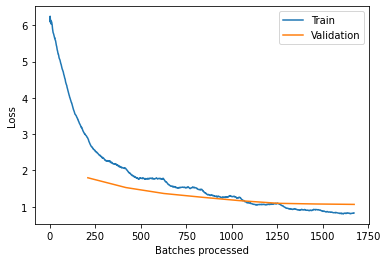

In [12]:
# the loss function is cross entropy loss: did you predict the right label and how confidently? 
# interperate plot
learn.recorder.plot_losses()

In [17]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


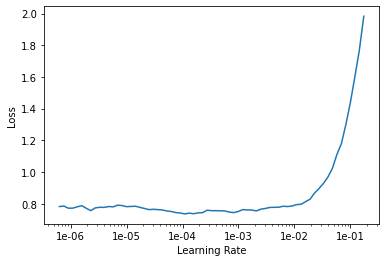

In [18]:
# interperate plot
learn.recorder.plot()

In [28]:
# talk about how ive only trained last layer and what unfreeze does.
learn.unfreeze()

In [29]:
# talk about why not teach all wieghts at the same rate and what slice does here.
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.813156,1.053753,0.284006,02:07
1,0.753002,0.984252,0.263677,02:06
2,0.621162,0.960520,0.255904,02:07
3,0.538932,0.957927,0.254410,02:07


In [30]:
learn.save('stage-2')

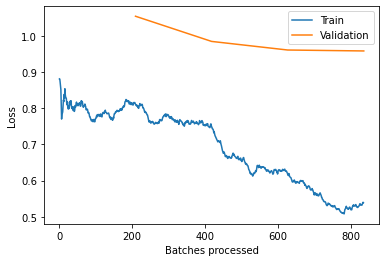

In [31]:
# interperate plot
learn.recorder.plot_losses()

In [64]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.575004,0.961240,0.246039,02:05
1,0.479087,0.947702,0.244544,02:06


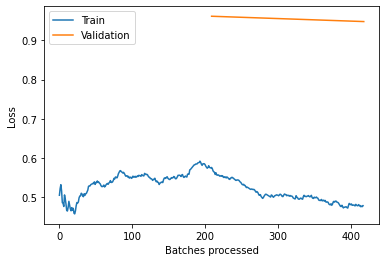

In [65]:
# interperate plot
learn.recorder.plot_losses()

In [66]:
# The classificationInterpretation object contains all the information needed to interperate the model.
# Basically exactly the things that I will looking at in the next few cells
interp = ClassificationInterpretation.from_learner(learn)

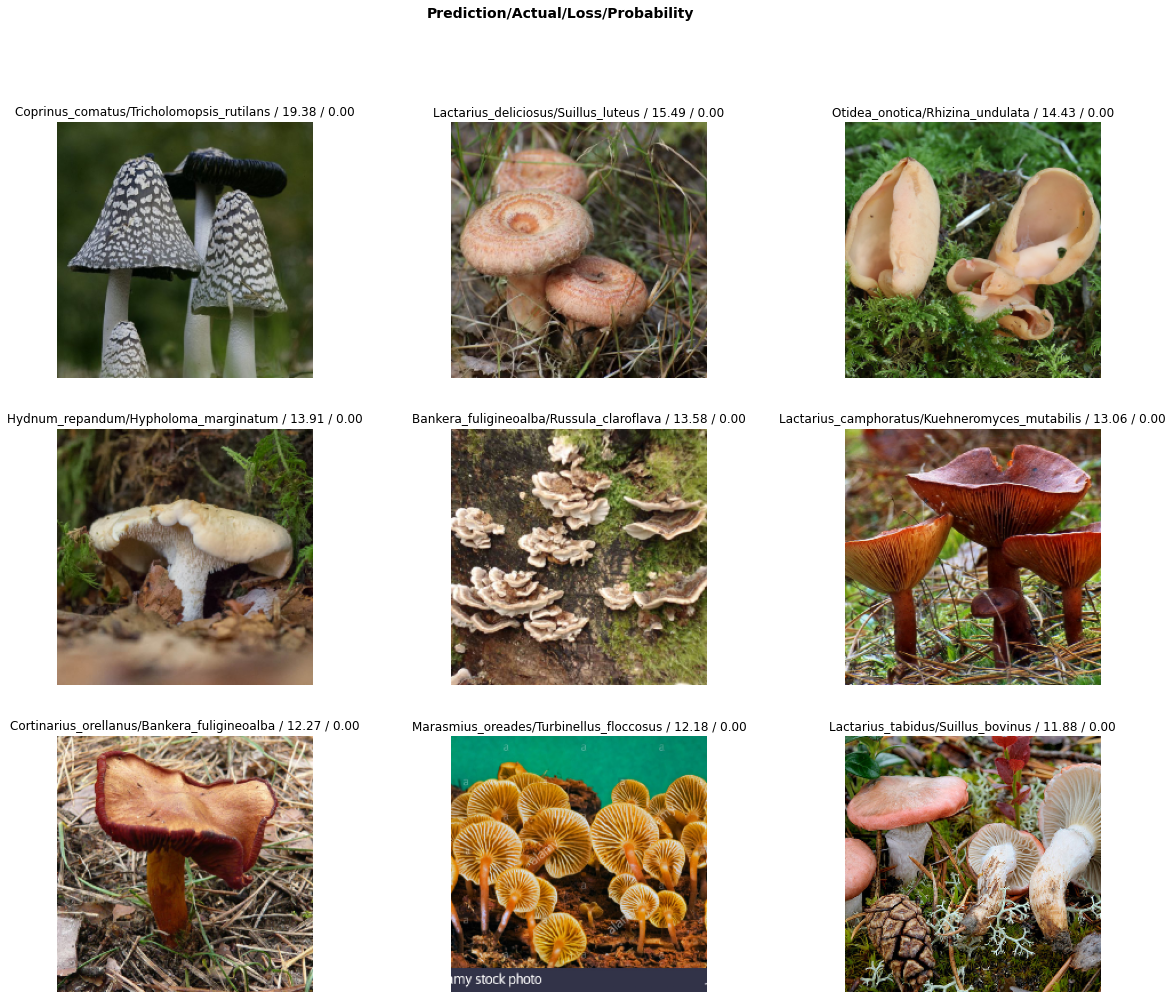

In [67]:
# explain top losses and mention how it was used in the second data cleaning step.
interp.plot_top_losses(9, figsize=(20,16))

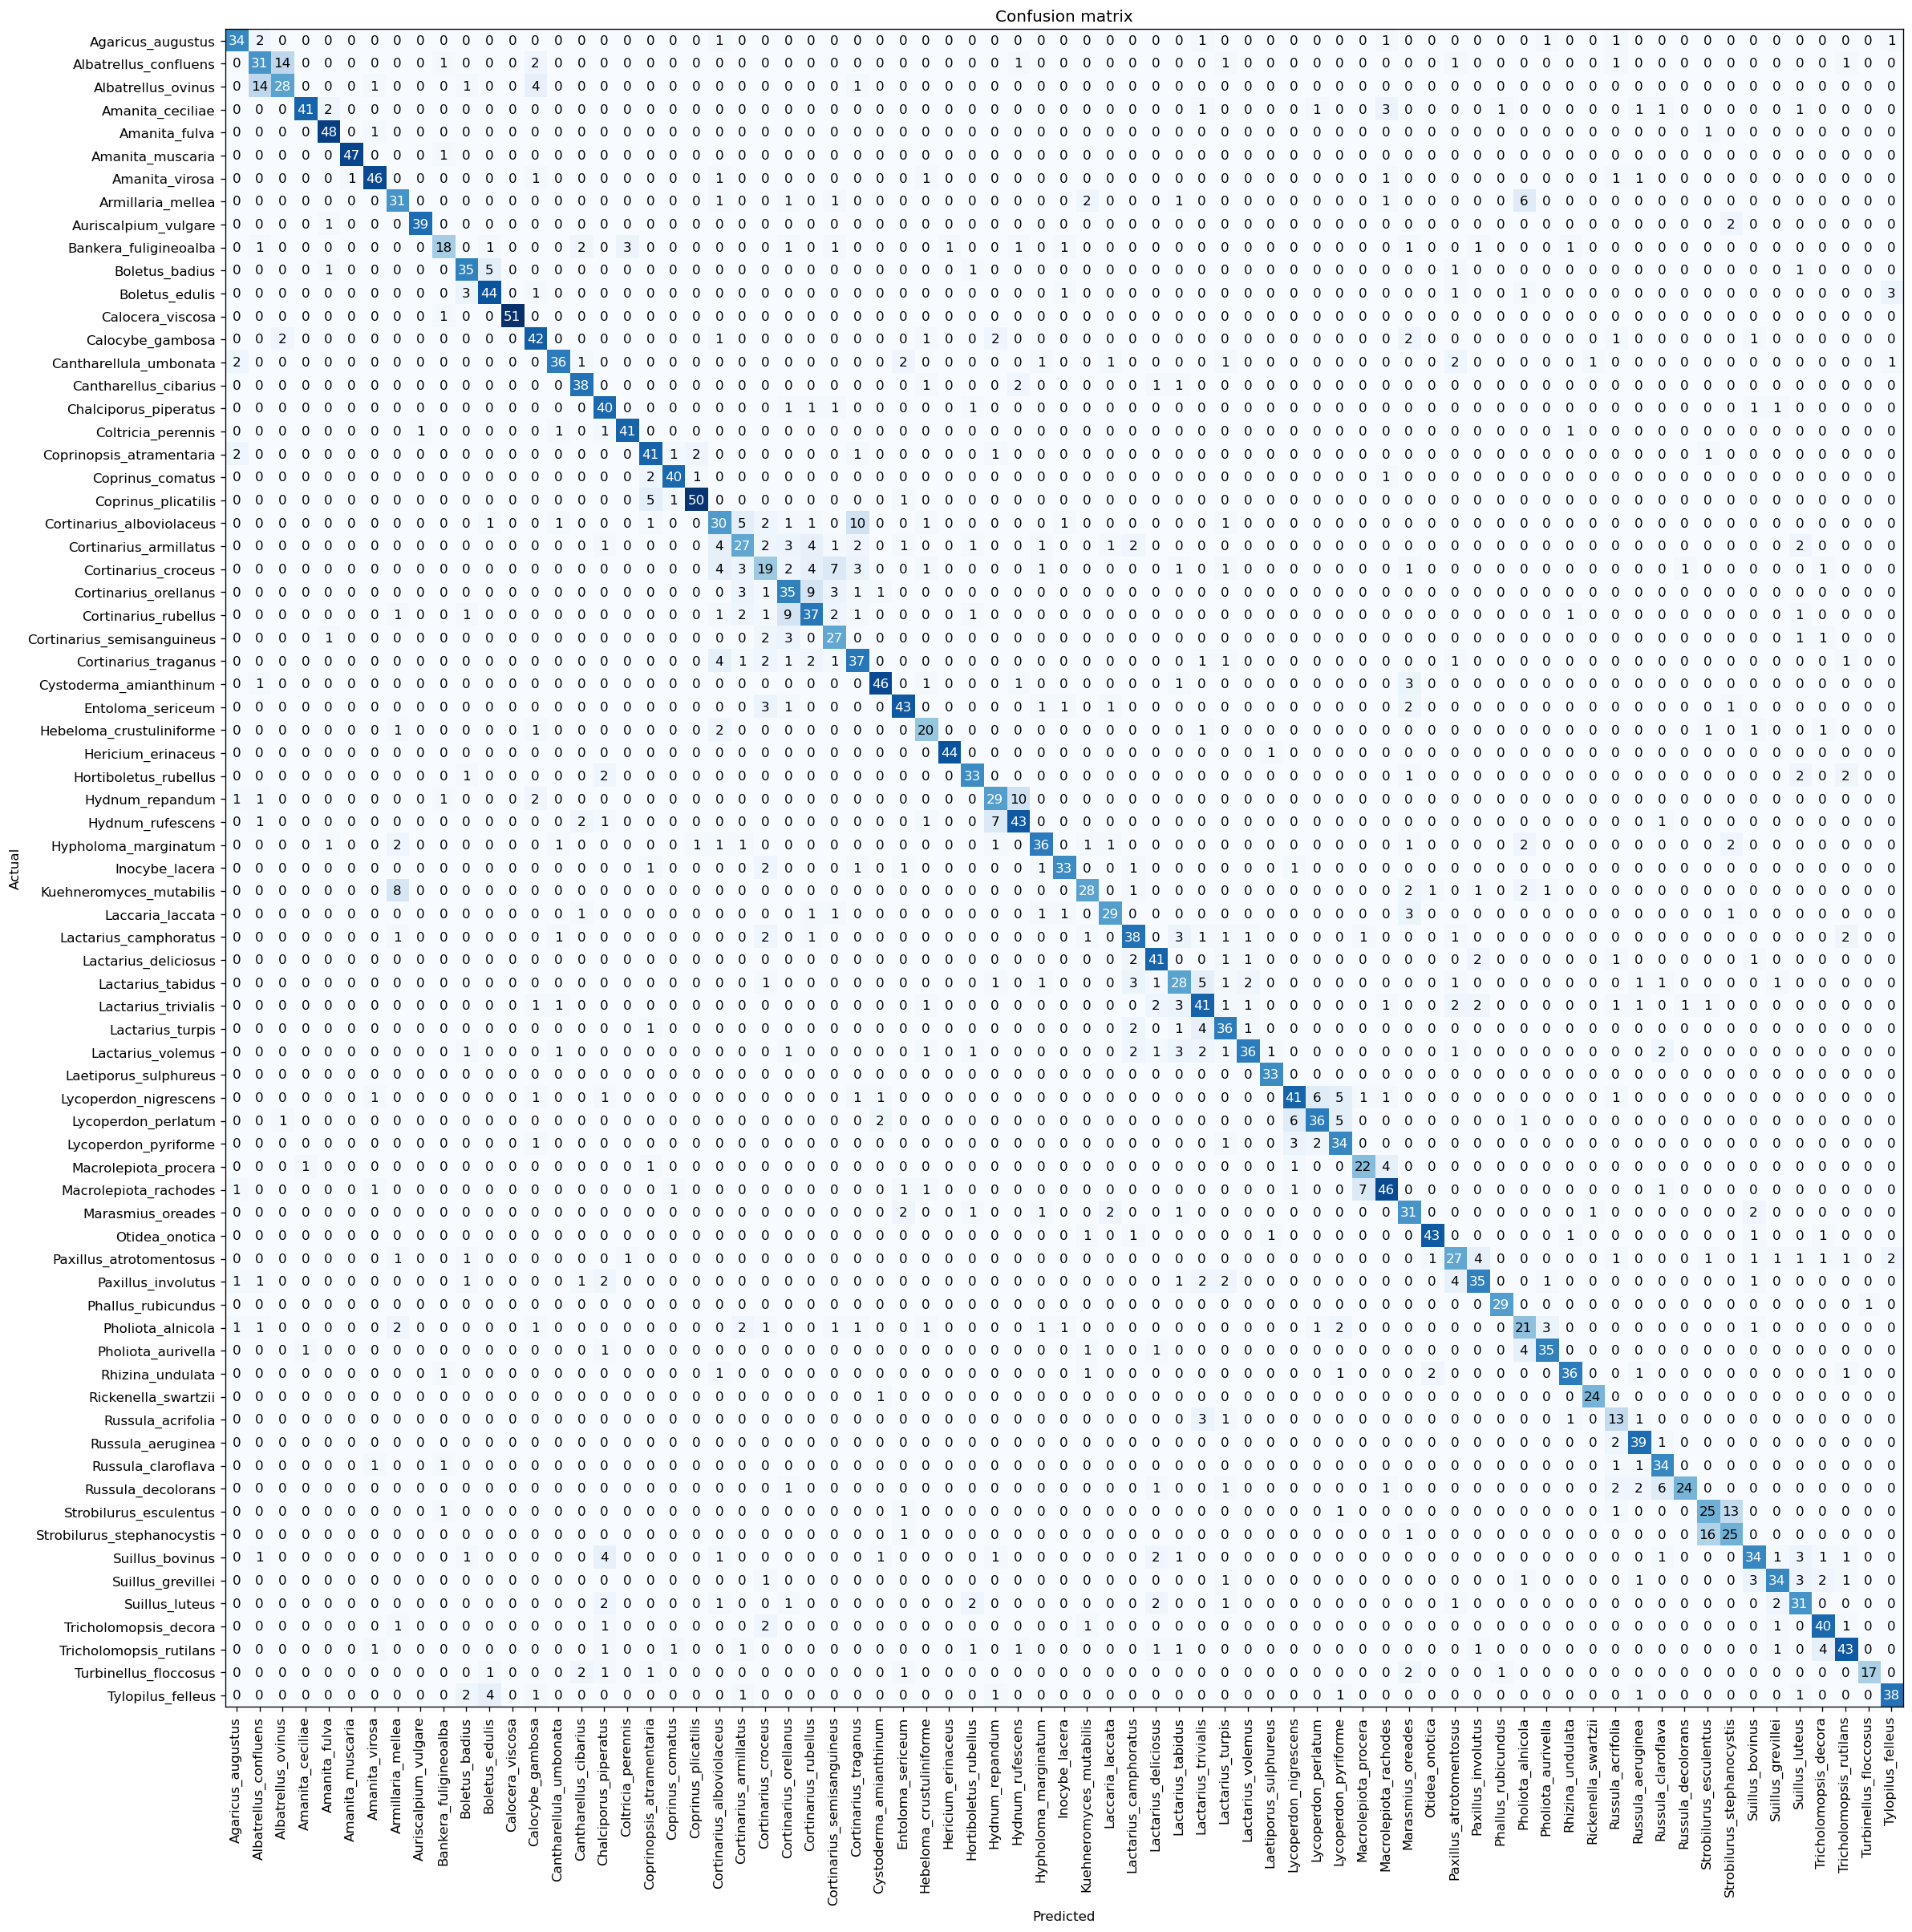

In [68]:
# explain confusion matrix and interperate.
interp.plot_confusion_matrix(figsize=(20,20), dpi=120)

In [69]:
# Same info as in confusion matrix but easier to see the worst cases.
# interperate.
interp.most_confused(min_val=2)

[('Strobilurus_stephanocystis', 'Strobilurus_esculentus', 16),
 ('Albatrellus_confluens', 'Albatrellus_ovinus', 14),
 ('Albatrellus_ovinus', 'Albatrellus_confluens', 14),
 ('Strobilurus_esculentus', 'Strobilurus_stephanocystis', 13),
 ('Cortinarius_alboviolaceus', 'Cortinarius_traganus', 10),
 ('Hydnum_repandum', 'Hydnum_rufescens', 10),
 ('Cortinarius_orellanus', 'Cortinarius_rubellus', 9),
 ('Cortinarius_rubellus', 'Cortinarius_orellanus', 9),
 ('Kuehneromyces_mutabilis', 'Armillaria_mellea', 8),
 ('Cortinarius_croceus', 'Cortinarius_semisanguineus', 7),
 ('Hydnum_rufescens', 'Hydnum_repandum', 7),
 ('Macrolepiota_rachodes', 'Macrolepiota_procera', 7),
 ('Armillaria_mellea', 'Pholiota_alnicola', 6),
 ('Lycoperdon_nigrescens', 'Lycoperdon_perlatum', 6),
 ('Lycoperdon_perlatum', 'Lycoperdon_nigrescens', 6),
 ('Russula_decolorans', 'Russula_claroflava', 6),
 ('Boletus_badius', 'Boletus_edulis', 5),
 ('Coprinus_plicatilis', 'Coprinopsis_atramentaria', 5),
 ('Cortinarius_alboviolaceus', '

In [70]:
learn.save('stage-3')

## Summary

**--summerize what happpened here--**

## Future work

Mushroom species classification is both a interesting problem because of its utility and because of the challenge that it presents. My intention is to continue to improve the accuracy and generalizablity of this model as I learn more about deep learning and other machine learning models and tools. The final step in this project will be to field test the model and put it into production making available to the BC mushroom foraging community. There are a number of possible avenues that I already have in mind that may improve the model. 

### Data augmentation

It may be possible to increase the generalizability and accuracy of the model by including more transforms (such as random cropping and resizing, random resizing and cropping) in the data augmentation step. 

I also noticed that there are a number of image of upside down mushrooms in my data set. This leads me to believe that it is a good idea to include a vertical flip transform.


These steps should help to make the model able to handle images that contain a wider range of mushroom orientations or  that capture only part of a mushroom. This will allow me to simplify the instructions that a user will need to understand and follow in order to get a reliable prediction from the model. 

### Progressive resizing

The idea behind progressive resizing (**citation needed**) is to increase the amount of data that your model sees in training by train a model on several resized versions of your data set. Typicaly you start with images of a smaller size than the final size that you intend to use to train the final model and work your way up to this maximum size. For instance, a progresive resizing workflow for our application might look like this:

1. Finetune resnet50 using our images resized to 56x56 pixels and save this model.
2. Finetune the model obtained in step 1 using our images resized to 122x112 pixels and save this model.
3. Finetune the nodel obtained in step 2 using our images resized to 224x224 pixels.

### Including more features  

"""A mushroom guide is a must for anyone interested in foraging for mushrooms. It's helpful if the guide includes pictures of poisonous mushrooms, but because of the sheer number of possibilities, it's even more helpful if the guide can zero in on a species as you enter information about the specimen you found. One such mushroom guide, posted by researchers from the University of Aarhus and University of Copenhagen, Denmark, is available online. It's called MycoKey, and it isn't the only such guide.

A number of factors enter into a positive identification. They include not just appearance, but also location, season and growing conditions. Even if you can't make a positive identification, some general characteristics can alert you to the likelihood of a dangerous species."""

Many mushroom species (particularly those in the same family) are  similar in apearance. Musroom guides such as the one created by researchers from the University of Aarhus and University of Copenhagen([MycoKey](http://www.mycokey.com/)), typically incorparate a number of factors beyond appearance when trying to make a positive identification. These factors include location, season, and growing conditions.

**say something about how to connect up neural nets to do this**
will combine this with categorical info, but than it won't be classification just from the image.


### Data collection

Another way that the accuracy and generalizability of the model could be improved is to train it using more data. This means finding more images for each of the 73 categories of mushrooms that make up the scope of the classifier and or expanding the scope of the classifier by added more mushroom categories. It will definately be nessasary to expand the number of categories somewhat to cover more of the possible mushrooms that BC foragers could run into out in the woods. For instance the Amanita phalloides (AKA 'death cap') mushroom often closely resembles the Lycoperdon perlatum (AKA 'Common puffball') mushroom which is inside the scope of the classifier. Amanita phalloides isn't included in this first version of the classifier, this could lead to unfortunate consequences if the model were deployed as it is. Some possible sources to draw upon include: 

1. The university of Copenhagen issued a fungi classification challenge in 2018. As part of the challenge they released a [dataset](https://snm.ku.dk/english/news/all_news/2018/2018.5/the-fungi-classification-challenge/) contained 1,394 wild mushrooms species, with 85,578 training images and 4,182 validation images. 





- larger data set (more species and maybe more images per species but exponentially more data will probably be needed to improve accuracy by adding more data)

### Class binning

1. Look through the classes my self and put them into groups
2. Use. confusion matrix to put them into groups
3. compare groups generated by 1. and 2. 
4. decide which binning to move forward with, or maybe to combine the two binnings somehow
5. Train a model with the new classes

*to implement this in code:* 
1. Need to figure out how to get the binniing from the confusion matrix, Idea is that I want to figure out a good formula: Ill probably choose one of these

- con(a,b) + con(b,a) > threshold 
- con(a,b) > threshold and con(b,a) > threshold
Then I need to write a script that will figure out the classes and give me a list I can feed into step 2. below.

Also it might be possible to use accuracy threshold to get multiple labels and group based on the labels that appear together most often.

2. Need to figure out how to change the label of the classes in my data set given the new classes stored as a list. I can do this with dataframes, just need to figure out how to do with databunches, probably there is a dataframe back there. 


### Model evaluation

- add more or different metrics to evaluate the model by like ROC-AUC
- use ROC-AUC see if the model is distinguishing between posion and edible well.

